This is the classification training script.

Training Labels: {"COVID": 0, "Lung": 1, "Normal": 2, "Viral": 3}

In [1]:
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '../Data/classification_data/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
validation = tf.keras.preprocessing.image_dataset_from_directory(
    '../Data/classification_data/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 20165 files belonging to 4 classes.
Using 16132 files for training.
Found 20165 files belonging to 4 classes.
Using 4033 files for validation.


In [4]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(4, activation= 'softmax')
])

In [5]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
## fit model
history=model.fit(train_data,validation_data= validation,batch_size=32,epochs = 20,callbacks=[early])

Epoch 1/20
505/505 [==============================] - 708s 1s/step - loss: 0.7528 - accuracy: 0.7412 - val_loss: 0.5034 - val_accuracy: 0.8034
Epoch 2/20
505/505 [==============================] - 687s 1s/step - loss: 0.4580 - accuracy: 0.8288 - val_loss: 0.4480 - val_accuracy: 0.8242
Epoch 3/20
505/505 [==============================] - 679s 1s/step - loss: 0.3636 - accuracy: 0.8636 - val_loss: 0.4378 - val_accuracy: 0.8520
Epoch 4/20
505/505 [==============================] - 698s 1s/step - loss: 0.2900 - accuracy: 0.8944 - val_loss: 0.4357 - val_accuracy: 0.8520
Epoch 5/20
505/505 [==============================] - 865s 2s/step - loss: 0.2272 - accuracy: 0.9160 - val_loss: 0.4424 - val_accuracy: 0.8624
Epoch 6/20
505/505 [==============================] - 840s 2s/step - loss: 0.1920 - accuracy: 0.9297 - val_loss: 0.4588 - val_accuracy: 0.8569
Epoch 7/20
505/505 [==============================] - 814s 2s/step - loss: 0.1488 - accuracy: 0.9456 - val_loss: 0.5615 - val_accuracy: 0.8485

In [8]:
model.save('models/real_data')

INFO:tensorflow:Assets written to: models/real_data/assets


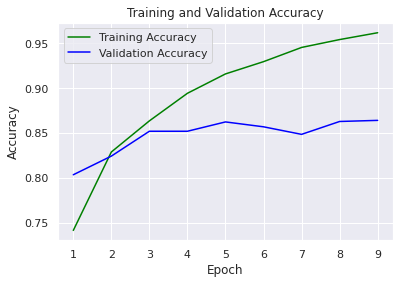

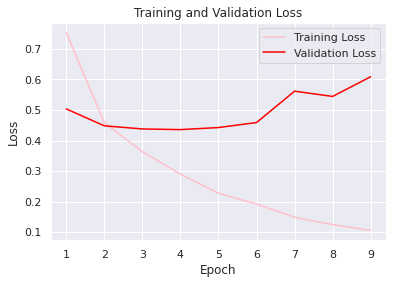

In [9]:
#plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

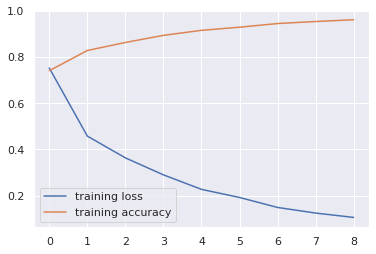

In [10]:
#training accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

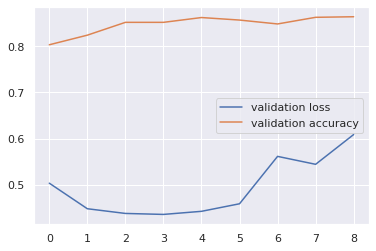

In [11]:
#validation accuracy and loss
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [12]:
import os
import glob

class_names =  ["COVID-19","Lung","NORMAL","Viral Pneumonia"]

[0]
COVID-19


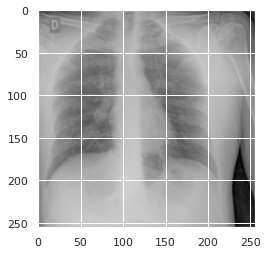

In [14]:
#example 1
image_path = glob.glob(os.path.join("../Data/classification_data/test/COVID", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
NORMAL


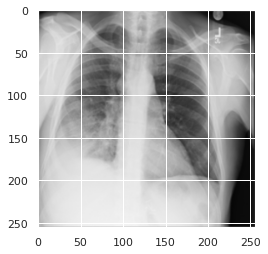

In [16]:
#example 2
image_path = glob.glob(os.path.join("../Data/classification_data/test/Lung", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
NORMAL


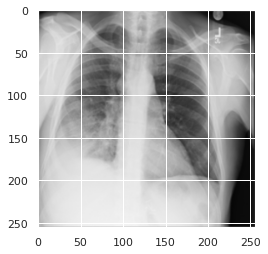

In [17]:
#example 3
glob.glob(os.path.join("../Data/classification_data/test/Normal", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
NORMAL


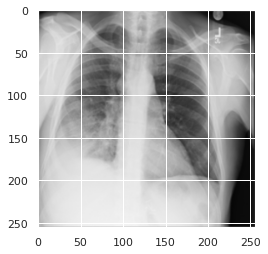

In [18]:
#example 4
glob.glob(os.path.join("../Data/classification_data/test/Viral", "*.png"))[0]
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [19]:
pred_list = np.zeros((250,4))

In [65]:
#model = keras.models.load_model('models/real_data')
label_names= ["COVID", "Lung", "Normal", "Viral"]

In [66]:
for idx, label in enumerate(label_names):
    path_list = sorted(glob.glob(os.path.join("../Data/classification_data/test", label, "*.png")))
    print("testing %d %s CXR images" %(len(path_list), label))

    for i in range(len(path_list)):
        image_path = path_list[i]
        new_img = image.load_img(image_path, target_size=(256, 256))
        img = image.img_to_array(new_img)
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        prediction = np.argmax(prediction,axis=1)
        pred_list[i,idx] = prediction

testing 250 COVID CXR images
testing 250 Lung CXR images
testing 250 Normal CXR images
testing 250 Viral CXR images


In [67]:
pred_list

array([[0., 1., 2., 3.],
       [2., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 1., 3.],
       [0., 2., 2., 1.],
       [0., 1., 2., 0.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 0., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 0., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 0., 2., 3.],
       [0., 1., 2., 0.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [1., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 0., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],


In [68]:
df = pd.DataFrame(pred_list)

In [69]:
df.columns = class_names

In [70]:
df.to_csv("classification_real.csv")

In [71]:
label = np.zeros((250,4))

In [72]:
label[:,0] = 0
label[:,1] = 1
label[:,2] = 2
label[:,3] = 3

In [73]:
label = pd.DataFrame(label)
label.columns = class_names

In [74]:
label

,COVID-19,Lung,NORMAL,Viral Pneumonia
0,0.0,1.0,2.0,3.0
1,0.0,1.0,2.0,3.0
2,0.0,1.0,2.0,3.0
3,0.0,1.0,2.0,3.0
4,0.0,1.0,2.0,3.0
...,...,...,...,...
245,0.0,1.0,2.0,3.0
246,0.0,1.0,2.0,3.0
247,0.0,1.0,2.0,3.0
248,0.0,1.0,2.0,3.0


In [75]:
(df == label).sum(axis = 0)/250

COVID-19           0.924
Lung               0.752
NORMAL             0.924
Viral Pneumonia    0.920
dtype: float64